In [4]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [5]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method)
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

Data shape: (45211, 9)


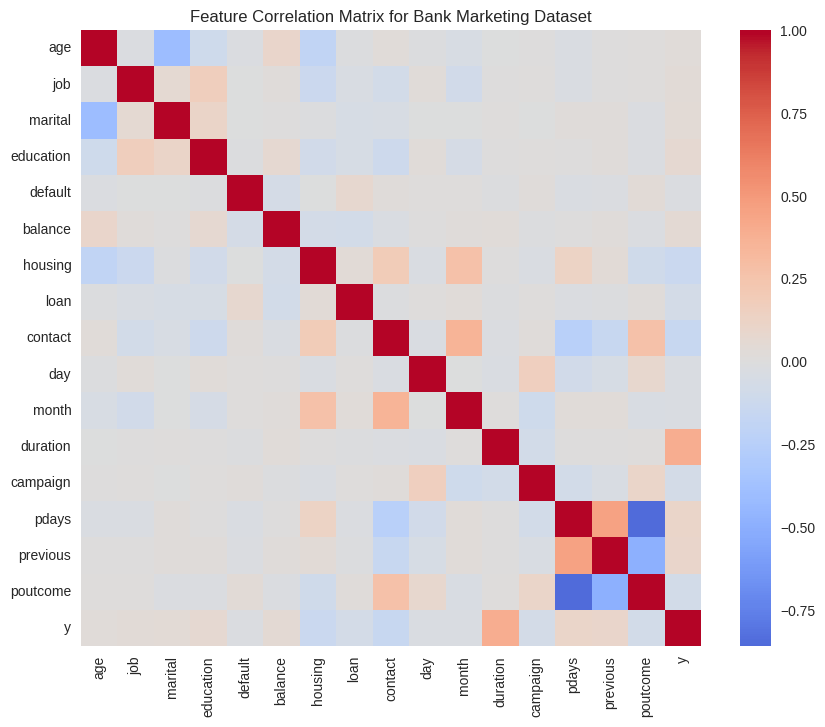

In [11]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.

    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    df = pd.read_csv(filepath, sep=';')

    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome', 'y']

    # TODO: Apply label encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
               'housing', 'loan', 'default']
    X = df[features]

    # TODO: Scale the features
    scaler= StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('/content/bank-full.csv')
print("Data shape:", X_scaled.shape)

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix for Bank Marketing Dataset")
plt.show()

In [7]:
class KMeansClustering:
    """Minimal K-means implementation for clustering."""

    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Randomly select n_clusters distinct samples from X as initial centroids."""
        np.random.seed(self.random_state)
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        centroids = X[indices]
        return centroids

    def _assign_clusters(self, X):
        """Assign each point to the nearest centroid (Euclidean distance)."""
        # Compute distance from every point to every centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        # Assign cluster label as index of closest centroid
        labels = np.argmin(distances, axis=1)
        return labels

    def _update_centroids(self, X, labels):
        """Compute new centroids as mean of assigned points."""
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                new_centroids[k] = cluster_points.mean(axis=0)
            else:
                # If a cluster gets no points, keep old centroid
                new_centroids[k] = self.centroids[k]
        return new_centroids

    def fit(self, X):
        """Run K-means clustering until convergence or max_iters."""
        # Initialize centroids
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iters):
            # Assign clusters
            labels = self._assign_clusters(X)
            # Update centroids
            new_centroids = self._update_centroids(X, labels)

            # Check for convergence (small centroid movement)
            if np.allclose(self.centroids, new_centroids, atol=1e-6):
                break

            self.centroids = new_centroids

        self.labels = labels
        return self

    def predict(self, X):
        """Assign cluster labels to new data using trained centroids."""
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)

## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

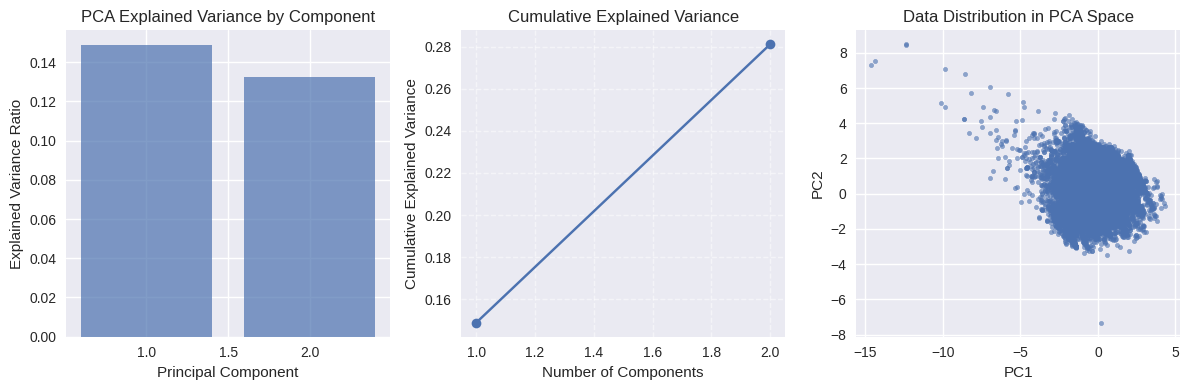

Shape after PCA: (45211, 2)


In [13]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.

    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # TODO: Create visualization
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_, alpha=0.7)
    plt.xlabel("Principal Component")
    plt.ylabel("Explained Variance Ratio")
    plt.title("PCA Explained Variance by Component")
    # Plot explained variance
    plt.subplot(1, 3, 2)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(range(1, n_components + 1), cumulative_variance, marker='o')
    plt.xlabel("Number of Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.title("Cumulative Explained Variance")
    plt.grid(True, linestyle='--', alpha=0.5)

    # Plot data in 2D

    # Your code here
    if n_components >= 2:
        plt.subplot(1, 3, 3)
        plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, alpha=0.6)
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.title("Data Distribution in PCA Space")

    plt.tight_layout()
    plt.show()
    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

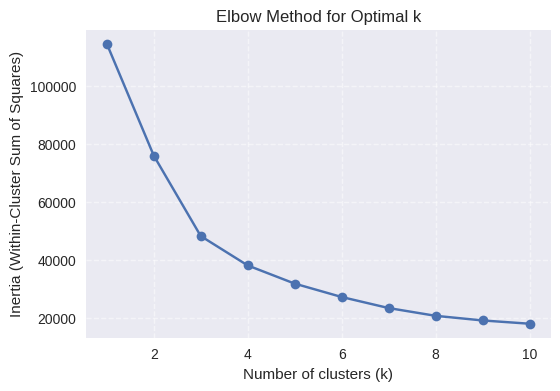

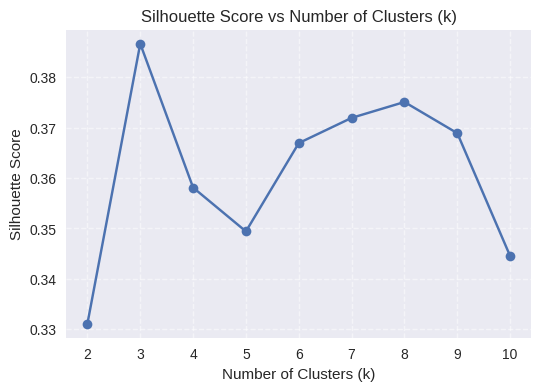

Highest Silhouette Score = 0.3867 at k = 3


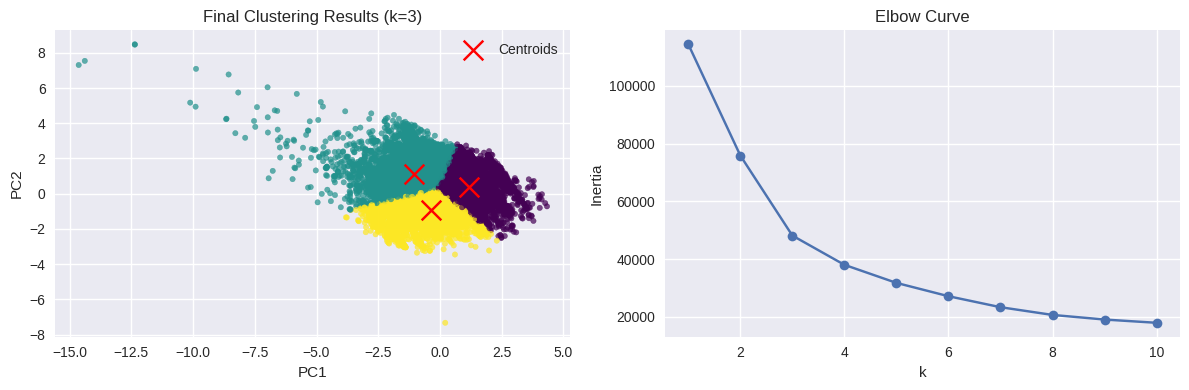


Clustering Evaluation:
Inertia: 48179.64
Silhouette Score: 0.39


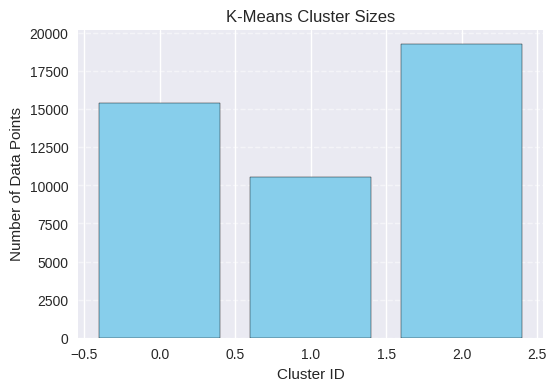

Cluster 0: 15411 samples
Cluster 1: 10541 samples
Cluster 2: 19259 samples


/tmp/ipython-input-2910814167.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="Silhouette", data=df, palette="viridis")


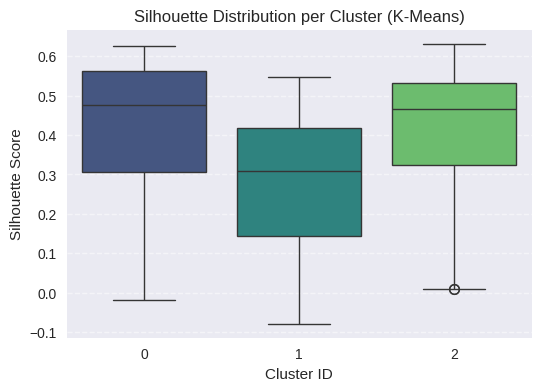


Mean Silhouette Score per Cluster:
Cluster
0    0.422738
1    0.280316
2    0.415978
Name: Silhouette, dtype: float64


In [17]:
from sklearn.metrics import silhouette_samples
def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).

    TODO:
    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    # Your code here
    inertia = 0
    for k in range(len(centroids)):
        cluster_points = X[labels == k]
        # Sum of squared distances to centroid
        inertia += np.sum((cluster_points - centroids[k]) ** 2)
    return inertia
    # Calculate distances between points and their assigned centroids
    return inertia

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters.

    TODO:
    1. Try different values of k (1 to max_k)
    2. Calculate inertia for each k
    3. Plot k vs inertia
    4. Help identify the 'elbow' point
    """
    # Your code here
    inertias = []
    K = range(1, max_k + 1)

    # Calculate inertia for different k values
    # Your code here
    for k in K:
      kmeans = KMeansClustering(n_clusters=k)
      kmeans.fit(X)
      inertia = calculate_inertia(X, kmeans.labels, kmeans.centroids)
      inertias.append(inertia)
    # Create elbow plot
    # Your code here
    plt.figure(figsize=(6, 4))
    plt.plot(K, inertias, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
    return inertias
from sklearn.metrics import silhouette_score

def plot_silhouette_scores(X, max_k=10):
    """Plot silhouette scores for different k values to identify optimal clusters."""
    silhouette_scores = []
    K = range(2, max_k + 1)  # silhouette undefined for k=1

    for k in K:
        kmeans = KMeansClustering(n_clusters=k)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels)
        silhouette_scores.append(score)

    # Plot silhouette scores
    plt.figure(figsize=(6, 4))
    plt.plot(K, silhouette_scores, marker='o')
    plt.title('Silhouette Score vs Number of Clusters (k)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # Print best k
    best_k = K[np.argmax(silhouette_scores)]
    print(f"Highest Silhouette Score = {max(silhouette_scores):.4f} at k = {best_k}")

    return silhouette_scores
def plot_cluster_sizes(labels):
    """Plot number of samples in each K-Means cluster."""
    unique, counts = np.unique(labels, return_counts=True)

    plt.figure(figsize=(6, 4))
    plt.bar(unique, counts, color='skyblue', edgecolor='black')
    plt.title("K-Means Cluster Sizes")
    plt.xlabel("Cluster ID")
    plt.ylabel("Number of Data Points")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

    for i, c in zip(unique, counts):
        print(f"Cluster {i}: {c} samples")

def plot_silhouette_distribution(X, labels):
    """Plot silhouette score distribution for each cluster."""
    sil_values = silhouette_samples(X, labels)
    df = pd.DataFrame({"Cluster": labels, "Silhouette": sil_values})

    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Cluster", y="Silhouette", data=df, palette="viridis")
    plt.title("Silhouette Distribution per Cluster (K-Means)")
    plt.xlabel("Cluster ID")
    plt.ylabel("Silhouette Score")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

    cluster_means = df.groupby("Cluster")["Silhouette"].mean()
    print("\nMean Silhouette Score per Cluster:")
    print(cluster_means)

inertias = plot_elbow_curve(X_pca, max_k=10)
silhouette_scores = plot_silhouette_scores(X_pca, max_k=10)

# Apply final clustering (e.g., choose k=3)
kmeans = KMeansClustering(n_clusters=3)
kmeans.fit(X_pca)

# Visualize final results
plt.figure(figsize=(12, 4))

# Plot clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis', s=15, alpha=0.7)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            c='red', marker='x', s=200, label='Centroids')
plt.title('Final Clustering Results (k=3)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Plot evaluation metric: inertia trend
plt.subplot(1, 2, 2)
plt.plot(range(1, len(inertias) + 1), inertias, marker='o')
plt.title('Elbow Curve')
plt.xlabel('k')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

# Calculate and print evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")
plot_cluster_sizes(kmeans.labels)
plot_silhouette_distribution(X_pca, kmeans.labels)

## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

Silhouette Score: 0.3361


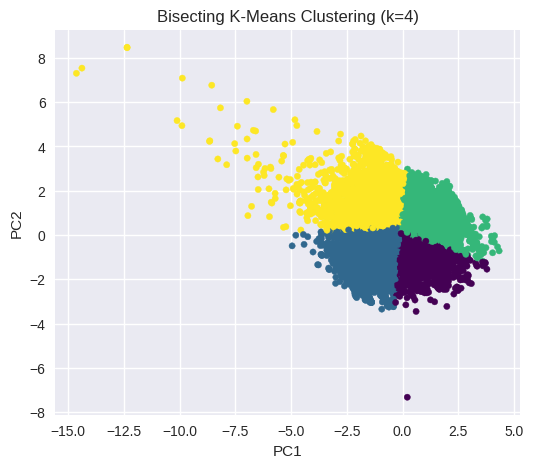

In [10]:
class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.

    Students should implement `fit_predict` to recursively split clusters until
    `n_clusters` is reached.
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached.

        TODO (student):
        - Start with all points assigned to label 0.
        - While number of unique labels < n_clusters:
            - Select a cluster to split (e.g., the largest cluster by size)
            - Run a binary KMeans (k=2) on the points in that cluster
            - Assign new labels (keep one child label as the original, give the other a new id)
            - Record parent -> (left, right) in `self.split_tree` and centroids in `self.centers_`
        - Set and return `self.labels_` (numpy array of length n_samples)

        Hints:
        - Use sklearn.cluster.KMeans(n_clusters=2, random_state=self.random_state) for the split step
        - Keep a counter for new label ids and increment when creating a new cluster
        - Use boolean indexing to operate on subsets of X efficiently
        """
        n_samples = X.shape[0]
        self.labels_ = np.zeros(n_samples, dtype=int)  # all points in one cluster initially
        current_num_clusters = 1
        next_label = 1

        # Initialize centroid for the root cluster
        self.centers_[0] = np.mean(X, axis=0)

        while current_num_clusters < self.n_clusters:
            # 1️⃣ Find the cluster to split — largest cluster by size
            unique_labels, counts = np.unique(self.labels_, return_counts=True)
            cluster_to_split = unique_labels[np.argmax(counts)]

            # 2️⃣ Get data points of this cluster
            cluster_points = X[self.labels_ == cluster_to_split]

            # Skip splitting clusters that have too few points
            if len(cluster_points) <= 1:
                break

            # 3️⃣ Perform a binary KMeans (k=2)
            kmeans = KMeans(n_clusters=2, random_state=self.random_state)
            sub_labels = kmeans.fit_predict(cluster_points)

            # 4️⃣ Assign new labels globally
            global_mask = (self.labels_ == cluster_to_split)
            # Keep one cluster as old label, assign new label to the other
            self.labels_[global_mask] = np.where(sub_labels == 0, cluster_to_split, next_label)

            # 5️⃣ Record split and centroids
            self.split_tree[cluster_to_split] = (cluster_to_split, next_label)
            self.centers_[cluster_to_split] = kmeans.cluster_centers_[0]
            self.centers_[next_label] = kmeans.cluster_centers_[1]

            # 6️⃣ Update counters
            current_num_clusters += 1
            next_label += 1

        return self.labels_
        raise NotImplementedError('Implement the bisecting algorithm as a student exercise')

# Example (for instructor use only):
# bisect = BisectingKMeans(n_clusters=4)
# labels = bisect.fit_predict(X_pca)
# plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
from sklearn.cluster import KMeans
bisect = BisectingKMeans(n_clusters=4, random_state=42)
labels = bisect.fit_predict(X_pca)
sil_score = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {sil_score:.4f}")
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=20)
plt.title("Bisecting K-Means Clustering (k=4)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!